# Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import rasterio
import os
from osgeo import gdal

# Allow division by zero
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

# Load data

In [2]:
# Load red, green, green, and NIR bands

with rasterio.open('E:/Python/Geospatial python/data/B02.tif') as src:
    blue = src.read(1)
    
with rasterio.open('E:/Python/Geospatial python/data/B03.tif') as src:
    green = src.read(1)

with rasterio.open('E:/Python/Geospatial python/data/B04.tif') as src:
    red = src.read(1)
    
with rasterio.open('E:/Python/Geospatial python/data/B08.tif') as src:
    nir = src.read(1)

# Get the spatial extent of the raster
left, bottom, right, top = src.bounds

# Plot data

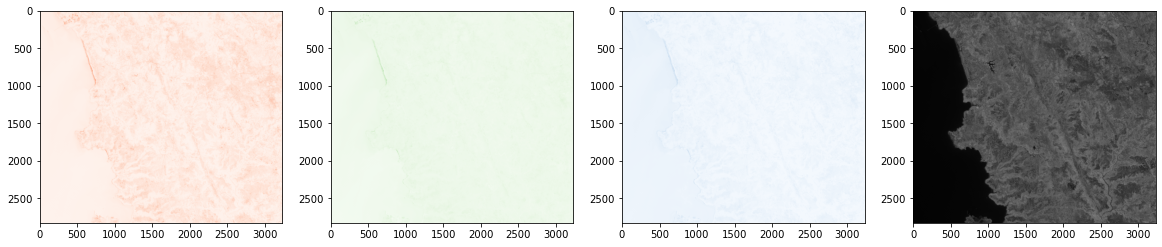

In [3]:
# plot all the bands seperately

fig = plt.figure(figsize=(20,8))

ax1 = fig.add_subplot(1,4,1)
ax1.imshow(red, cmap='Reds')

ax1 = fig.add_subplot(1,4,2)
ax1.imshow(green, cmap='Greens')

ax1 = fig.add_subplot(1,4,3)
ax1.imshow(blue, cmap='Blues')

ax1 = fig.add_subplot(1,4,4)
ax1.imshow(nir, cmap='gray')

In [4]:
# stack all bands together
rgb_composite_raw= np.dstack((red, green, blue, nir))

### In the case of RGB data, imshow() expects the pixel values to be in the range of [0, 1] for floating-point values or [0, 255] for integer values. This range corresponds to the valid range of pixel intensities for displaying images. It will give error to solve this error we have to normalize the data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


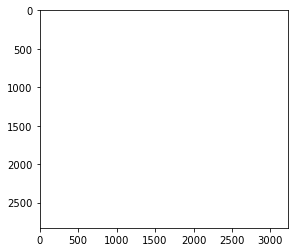

In [5]:
# plot the image
plt.imshow(rgb_composite_raw)

# True colour composite

#### A true color composite is a visualization technique commonly used in remote sensing and image processing to represent satellite or aerial imagery as it would appear to the human eye. It involves combining three bands of an image to create a composite image where each band corresponds to the red, green, and blue channels, respectively.

#### Typically, the red band is assigned to the red channel, the green band is assigned to the green channel, and the blue band is assigned to the blue channel. This way, when the composite image is displayed, the resulting colors closely resemble what would be seen by the human eye.

# Normalize the data

#### In the following code, normalize() function takes a single band (e.g., red, green, or blue) as input and calculates the minimum and maximum pixel values (band_min and band_max) within that band. It then subtracts the minimum value from each pixel and divides it by the difference between the maximum and minimum values to normalize the pixel values between 0 and 1. The normalized band is assigned to red_n, green_n, or blue_n accordingly.

#### By normalizing each band separately, you ensure that the pixel values within each band are scaled proportionally, which is useful when combining the bands to create an RGB image later on.

In [17]:
def normalize(band):
    # Calculate the range of values in the band
    band_range = np.ptp(band)
    
    # find max and min value # use this or above line to find min and max
    # band_min, band_max = (band.min(), band.max())
    
    # Normalize the band to the range [0, 1]
    normalized_band = (band - np.min(band)) / band_range
    
    return normalized_band

# Normalize each band
red_n = normalize(red)
green_n = normalize(green)
blue_n = normalize(blue)

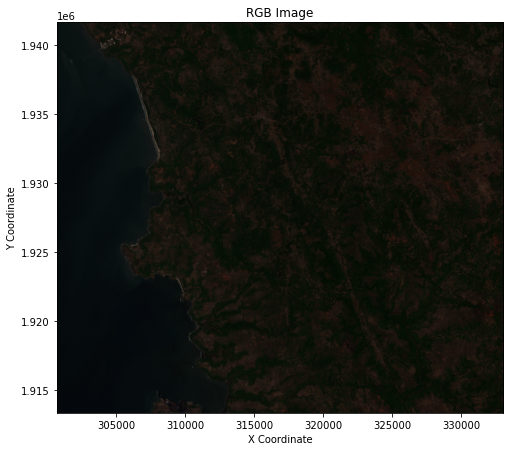

In [18]:
# stack all bands together
rgb_composite_normalize= np.dstack((red_n, green_n, blue_n))

# plot the image
plt.figure(figsize = (8,8))
plt.imshow(rgb_composite_normalize, extent=[left, right, bottom, top])
plt.title('RGB Image')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

# Image preprocessing

# Alpha and beta correction

### Alpha Correction:
#### Alpha correction, also known as gain correction or multiplicative correction, is applied to adjust the overall brightness of an image. It compensates for the differences in reflectance values caused by variations in the sensor's gain or sensitivity. The alpha correction factor is multiplied by the pixel values to scale them and bring the image to a consistent brightness level. It helps to normalize the data and ensure that different images or bands are comparable.

### Beta Correction:
#### Beta correction, also known as offset correction or additive correction, is applied to adjust the contrast of an image. It compensates for the differences in offset or bias values caused by variations in the sensor's calibration or atmospheric conditions. The beta correction factor is added to the pixel values to shift the overall brightness level, enhancing the contrast in the image. Beta correction helps to improve the visual appearance of the image and reveal more details.

#### Both alpha and beta corrections are often performed together as a preprocessing step to ensure consistent and visually appealing satellite imagery or aerial photographs. By applying these corrections, the image data can be standardized and made ready for further analysis, interpretation, or visualization. The values for alpha and beta factors are determined based on the characteristics of the sensor and the specific image acquisition conditions.

In [15]:
def preprocess_band(band, alpha=0.09, beta=0.15):
    # Brighten the band
    brightened_band = np.clip(alpha * band + beta, 0, 255)
    
    # Normalize the brightened band
    normalized_band = (brightened_band - np.min(brightened_band)) / (np.max(brightened_band) - np.min(brightened_band))
    
    return normalized_band

# Preprocess each band
red_bn = preprocess_band(red)
green_bn = preprocess_band(green)
blue_bn = preprocess_band(blue)

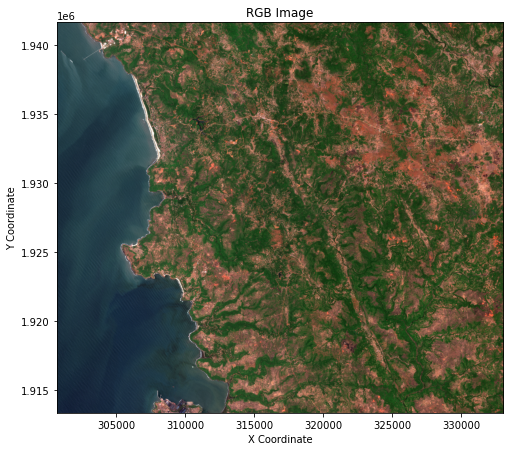

In [16]:
# stack all bands together
rgb_composite_bn= np.dstack((red_bn, green_bn, blue_bn))

# plot the image
plt.figure(figsize = (8,8))
plt.imshow(rgb_composite_bn, extent=[left, right, bottom, top])
plt.title('RGB Image')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

# Gamma correction

#### Gamma correction is a technique used to adjust the tonal response of an image, particularly to compensate for the nonlinear relationship between pixel values and perceived brightness. It is commonly applied in image processing to improve the visual appearance and accuracy of images displayed on different devices.

#### The human visual system perceives brightness logarithmically, whereas digital images are typically encoded linearly. Gamma correction is used to transform the pixel values of an image to match the nonlinear perception of brightness by the human eye.

#### The gamma correction function is defined as follows:

## V_out = V_in ^ (1 / gamma)

In [19]:
def normalize_and_gamma_correct(band, gamma=5):
    # Perform gamma correction and normalization
    gamma_corrected_band = np.power(band, 1/gamma)
    normalized_band = (gamma_corrected_band - np.min(gamma_corrected_band)) / np.ptp(gamma_corrected_band)
    
    return normalized_band

# Perform gamma correction and normalization on each band
red_gn = normalize_and_gamma_correct(red)
green_gn = normalize_and_gamma_correct(green)
blue_gn = normalize_and_gamma_correct(blue)

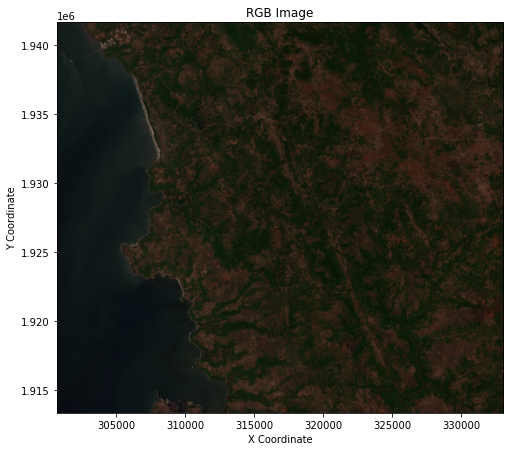

In [20]:
# stack all bands together
rgb_composite_gn= np.dstack((red_gn, green_gn, blue_gn))

# plot the image
plt.figure(figsize = (8,8))
plt.imshow(rgb_composite_gn, extent=[left, right, bottom, top])
plt.title('RGB Image')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

# False colour composite

#### A false color composite is a visualization technique used in remote sensing and image processing to represent satellite or aerial imagery by assigning different spectral bands to the red, green, and blue channels, creating a composite image that enhances specific features or information not visible to the human eye.

#### Unlike true color composite, where the red, green, and blue bands correspond to the visible light spectrum, in a false color composite, bands from non-visible portions of the electromagnetic spectrum are used. This technique helps highlight specific characteristics, such as vegetation health, land cover types, or geological features.

In [12]:
# normalize all bands
red_n = normalize(red)
green_n = normalize(green)
nir_n = normalize(nir)

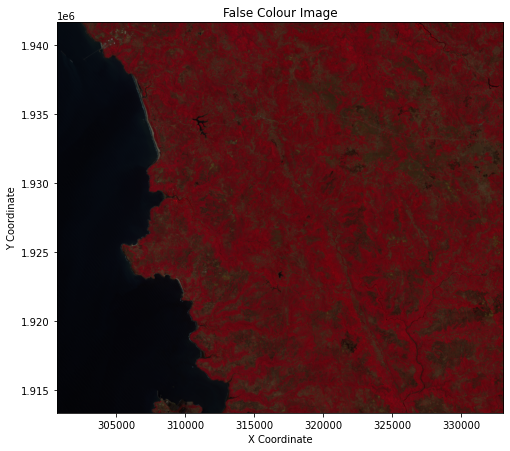

In [21]:
# stack all bands together
rgb_composite_fcc = np.dstack((nir_n, red_n, green_n))

# plot the image
plt.figure(figsize = (8,8))
plt.imshow(rgb_composite_fcc, extent=[left, right, bottom, top])
plt.title('False Colour Image')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()